In [1]:
%pip install dash
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import ttest_ind, pearsonr
from statsmodels.stats.proportion import proportions_ztest



In [3]:
df = pd.read_csv("England CSV.csv")

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12153 entries, 0 to 12152
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           12153 non-null  object 
 1   Season         12153 non-null  object 
 2   HomeTeam       12153 non-null  object 
 3   AwayTeam       12153 non-null  object 
 4   FTH Goals      12153 non-null  int64  
 5   FTA Goals      12153 non-null  int64  
 6   FT Result      12153 non-null  object 
 7   HTH Goals      11229 non-null  float64
 8   HTA Goals      11229 non-null  float64
 9   HT Result      11229 non-null  object 
 10  Referee        9329 non-null   object 
 11  H Shots        9329 non-null   float64
 12  A Shots        9329 non-null   float64
 13  H SOT          9329 non-null   float64
 14  A SOT          9329 non-null   float64
 15  H Fouls        9329 non-null   float64
 16  A Fouls        9329 non-null   float64
 17  H Corners      9329 non-null   float64
 18  A Corn

In [5]:
pd.set_option('display.max_columns', None)
print(df.head())

         Date   Season      HomeTeam                AwayTeam  FTH Goals  \
0  16/01/2025  2024/25  Ipswich Town  Brighton & Hove Albion          0   
1  16/01/2025  2024/25    Man United             Southampton          3   
2  15/01/2025  2024/25       Everton             Aston Villa          0   
3  15/01/2025  2024/25     Leicester          Crystal Palace          0   
4  15/01/2025  2024/25     Newcastle                  Wolves          3   

   FTA Goals FT Result  HTH Goals  HTA Goals HT Result       Referee  H Shots  \
0          2         A        0.0        1.0         A  T Harrington      5.0   
1          1         H        0.0        1.0         A      J Brooks     23.0   
2          1         A        0.0        0.0         D     S Barrott     10.0   
3          2         A        0.0        0.0         D      A Madley     21.0   
4          0         H        1.0        0.0         H     D England     17.0   

   A Shots  H SOT  A SOT  H Fouls  A Fouls  H Corners  A Corne

In [6]:
# Ver porcentagem de valores nulos em cada coluna
missing_pct = df.isnull().mean() * 100
print(missing_pct.sort_values(ascending=False))

H Red            23.237061
H Corners        23.237061
A Fouls          23.237061
A SOT            23.237061
H Fouls          23.237061
H SOT            23.237061
A Shots          23.237061
H Shots          23.237061
Referee          23.237061
A Red            23.237061
A Corners        23.237061
H Yellow         23.237061
A Yellow         23.237061
HTH Goals         7.603061
HT Result         7.603061
HTA Goals         7.603061
Date              0.000000
FTA Goals         0.000000
FT Result         0.000000
AwayTeam          0.000000
FTH Goals         0.000000
HomeTeam          0.000000
Season            0.000000
Display_Order     0.000000
League            0.000000
dtype: float64


In [7]:
# Ver porcentagem de valores nulos em cada coluna
missing_pct = df.isnull().mean() * 100
print(missing_pct.sort_values(ascending=False))

H Red            23.237061
H Corners        23.237061
A Fouls          23.237061
A SOT            23.237061
H Fouls          23.237061
H SOT            23.237061
A Shots          23.237061
H Shots          23.237061
Referee          23.237061
A Red            23.237061
A Corners        23.237061
H Yellow         23.237061
A Yellow         23.237061
HTH Goals         7.603061
HT Result         7.603061
HTA Goals         7.603061
Date              0.000000
FTA Goals         0.000000
FT Result         0.000000
AwayTeam          0.000000
FTH Goals         0.000000
HomeTeam          0.000000
Season            0.000000
Display_Order     0.000000
League            0.000000
dtype: float64


In [8]:
df = df.rename(columns={
    'Date': 'Data',
    'Season': 'Temporada',
    'HomeTeam': 'Time_Casa',
    'AwayTeam': 'Time_Visitante',
    'FTH Goals': 'Gols_Time_Casa',
    'FTA Goals': 'Gols_Time_Visitante',
    'FT Result': 'Resultado_Final',
    'HTH Goals': 'Gols_Casa_1T',
    'HTA Goals': 'Gols_Visitante_1T',
    'HT Result': 'Resultado_1T',
    'H Shots': 'Chutes_Casa',
    'A Shots': 'Chutes_Visitante',
    'H SOT': 'Chutes_Gol_Casa',
    'A SOT': 'Chutes_Gol_Visitante',
    'H Fouls': 'Faltas_Casa',
    'A Fouls': 'Faltas_Visitante',
    'H Corners': 'Escanteios_Casa',
    'A Corners': 'Escanteios_Visitante',
    'H Yellow': 'Amarelos_Casa',
    'A Yellow': 'Amarelos_Visitante',
    'H Red': 'Vermelhos_Casa',
    'A Red': 'Vermelhos_Visitante',
    'Display_Order': 'Ordem',
    'League': 'Liga',
    'Referee': 'Árbitro'
})


In [9]:
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

In [10]:
df['Árbitro'] = df['Árbitro'].fillna('Desconhecido')

In [11]:
df.isnull().sum()

Data                       0
Temporada                  0
Time_Casa                  0
Time_Visitante             0
Gols_Time_Casa             0
Gols_Time_Visitante        0
Resultado_Final            0
Gols_Casa_1T             924
Gols_Visitante_1T        924
Resultado_1T             924
Árbitro                    0
Chutes_Casa             2824
Chutes_Visitante        2824
Chutes_Gol_Casa         2824
Chutes_Gol_Visitante    2824
Faltas_Casa             2824
Faltas_Visitante        2824
Escanteios_Casa         2824
Escanteios_Visitante    2824
Amarelos_Casa           2824
Amarelos_Visitante      2824
Vermelhos_Casa          2824
Vermelhos_Visitante     2824
Ordem                      0
Liga                       0
dtype: int64

In [12]:
# Diferença de gols
df['Dif_Gols'] = df['Gols_Time_Casa'] - df['Gols_Time_Visitante']

# Total de gols na partida
df['Total_Gols'] = df['Gols_Time_Casa'] + df['Gols_Time_Visitante']

# Vitória do time da casa
df['Vitoria_Casa'] = (df['Gols_Time_Casa'] > df['Gols_Time_Visitante']).astype(int)

# Empate
df['Empate'] = (df['Gols_Time_Casa'] == df['Gols_Time_Visitante']).astype(int)

# Vitória visitante
df['Vitoria_Visitante'] = (df['Gols_Time_Casa'] < df['Gols_Time_Visitante']).astype(int)

# Intensidade ofensiva (soma dos chutes ao gol)
df['Intensidade_Ofensiva'] = df['Chutes_Gol_Casa'] + df['Chutes_Gol_Visitante']

In [13]:
# Times da casa
print(df['Time_Casa'].unique())

# Resultados finais (vitória casa, empate, vitória visitante)
print(df['Resultado_Final'].unique())

# Temporadas
print(df['Temporada'].unique())

# Ligas
print(df['Liga'].unique())

['Ipswich Town' 'Man United' 'Everton' 'Leicester' 'Newcastle' 'Arsenal'
 'Brentford' 'Chelsea' 'West Ham' "Nott'm Forest" 'Wolves' 'Fulham'
 'Liverpool' 'Tottenham' 'Aston Villa' 'Bournemouth' 'Crystal Palace'
 'Man City' 'Southampton' 'Brighton' 'Ipswich' 'Brighton & Hove Albion'
 'Sheffield United' 'Burnley' 'Luton' 'Leeds' 'Norwich' 'Watford'
 'West Brom' 'Huddersfield' 'Cardiff' 'Swansea' 'Stoke' 'Hull'
 'Sunderland' 'Middlesbrough' 'QPR' 'Wigan' 'Reading' 'Blackburn' 'Bolton'
 'Birmingham' 'Blackpool' 'Portsmouth' 'Derby' 'Charlton' 'Coventry'
 'Bradford' 'Sheffield Weds' 'Wimbledon' 'Barnsley' 'Swindon' 'Oldham']
['A' 'H' 'D']
['2024/25' '2023/24' '2022/23' '2021/22' '2020/21' '2019/20' '2018/19'
 '2017/18' '2016/17' '2015/16' '2014/15' '2013/14' '2012/13' '2011/12'
 '2010/11' '2009/10' '2008/09' '2007/08' '2006/07' '2005/06' '2004/05'
 '2003/04' '2002/03' '2001/02' '2000/01' '1999/00' '1998/99' '1997/98'
 '1996/97' '1995/96' '1994/95' '1993/94']
['Premier League']


In [14]:
df['Resultado_Final'] = df['Resultado_Final'].map({
    'H': 'Vitória Casa',
    'A': 'Vitória Visitante',
    'D': 'Empate'
})

In [15]:
df['Resultado_Final'].value_counts()

Resultado_Final
Vitória Casa         5563
Vitória Visitante    3482
Empate               3108
Name: count, dtype: int64

In [16]:
# Conjuntos dos times distintos em cada coluna
times_casa = set(df['Time_Casa'].unique())
times_visitante = set(df['Time_Visitante'].unique())

# Times que estão em casa mas não como visitantes (devem ser poucos ou nenhum)
print("Times só como mandante:", times_casa - times_visitante)

# Times que estão como visitantes mas não como mandantes
print("Times só como visitante:", times_visitante - times_casa)

# Ver se são exatamente os mesmos
print("Mesmos times nos dois lados?", times_casa == times_visitante)

Times só como mandante: set()
Times só como visitante: set()
Mesmos times nos dois lados? True


In [17]:
df.describe()

,Data,Gols_Time_Casa,Gols_Time_Visitante,Gols_Casa_1T,Gols_Visitante_1T,Chutes_Casa,Chutes_Visitante,Chutes_Gol_Casa,Chutes_Gol_Visitante,Faltas_Casa,Faltas_Visitante,Escanteios_Casa,Escanteios_Visitante,Amarelos_Casa,Amarelos_Visitante,Vermelhos_Casa,Vermelhos_Visitante,Ordem,Dif_Gols,Total_Gols,Vitoria_Casa,Empate,Vitoria_Visitante,Intensidade_Ofensiva
count,12153,12153.000000,12153.000000,11229.000000,11229.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,9329.000000,1.215300e+04,12153.000000,12153.000000,12153.000000,12153.000000,12153.000000,9329.000000
mean,2009-01-29 18:42:48.254751744,1.531309,1.160948,0.689554,0.511265,13.618716,10.784543,6.007503,4.704684,11.303462,11.781113,6.056383,4.770715,1.462536,1.785722,0.062386,0.085968,2.008629e+07,0.370361,2.692257,0.457747,0.255739,0.286514,10.712188
min,1993-08-14 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.993081e+07,-9.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2001-01-02 00:00:00,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,9.000000,9.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.001010e+07,-1.000000,1.000000,0.000000,0.000000,0.000000,8.000000
50%,2009-01-17 00:00:00,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,11.000000,12.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.009012e+07,0.000000,3.000000,0.000000,0.000000,0.000000,10.000000
75%,2017-01-21 00:00:00,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,14.000000,14.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000,2.017012e+07,1.000000,4.000000,1.000000,1.000000,1.000000,13.000000
max,2025-01-16 00:00:00,9.000000,9.000000,5.000000,5.000000,43.000000,31.000000,24.000000,20.000000,33.000000,29.000000,20.000000,19.000000,7.000000,9.000000,3.000000,2.000000,2.025012e+07,9.000000,11.000000,1.000000,1.000000,1.000000,33.000000
std,NaN,1.306927,1.147714,0.838796,0.731610,5.349420,4.678710,3.275177,2.757288,3.752442,3.931377,3.107327,2.746754,1.215747,1.285168,0.252706,0.291579,9.224046e+04,1.791741,1.685312,0.498232,0.436294,0.452151,4.184225


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12153 entries, 0 to 12152
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data                  12153 non-null  datetime64[ns]
 1   Temporada             12153 non-null  object        
 2   Time_Casa             12153 non-null  object        
 3   Time_Visitante        12153 non-null  object        
 4   Gols_Time_Casa        12153 non-null  int64         
 5   Gols_Time_Visitante   12153 non-null  int64         
 6   Resultado_Final       12153 non-null  object        
 7   Gols_Casa_1T          11229 non-null  float64       
 8   Gols_Visitante_1T     11229 non-null  float64       
 9   Resultado_1T          11229 non-null  object        
 10  Árbitro               12153 non-null  object        
 11  Chutes_Casa           9329 non-null   float64       
 12  Chutes_Visitante      9329 non-null   float64       
 13  Chutes_Gol_Casa 

In [19]:
df.head()

,Data,Temporada,Time_Casa,Time_Visitante,Gols_Time_Casa,Gols_Time_Visitante,Resultado_Final,Gols_Casa_1T,Gols_Visitante_1T,Resultado_1T,Árbitro,Chutes_Casa,Chutes_Visitante,Chutes_Gol_Casa,Chutes_Gol_Visitante,Faltas_Casa,Faltas_Visitante,Escanteios_Casa,Escanteios_Visitante,Amarelos_Casa,Amarelos_Visitante,Vermelhos_Casa,Vermelhos_Visitante,Ordem,Liga,Dif_Gols,Total_Gols,Vitoria_Casa,Empate,Vitoria_Visitante,Intensidade_Ofensiva
0,2025-01-16,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,Vitória Visitante,0.0,1.0,A,T Harrington,5.0,11.0,3.0,5.0,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,Premier League,-2,2,0,0,1,8.0
1,2025-01-16,2024/25,Man United,Southampton,3,1,Vitória Casa,0.0,1.0,A,J Brooks,23.0,13.0,9.0,5.0,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,Premier League,2,4,1,0,0,14.0
2,2025-01-15,2024/25,Everton,Aston Villa,0,1,Vitória Visitante,0.0,0.0,D,S Barrott,10.0,11.0,3.0,3.0,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,Premier League,-1,1,0,0,1,6.0
3,2025-01-15,2024/25,Leicester,Crystal Palace,0,2,Vitória Visitante,0.0,0.0,D,A Madley,21.0,9.0,4.0,4.0,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,Premier League,-2,2,0,0,1,8.0
4,2025-01-15,2024/25,Newcastle,Wolves,3,0,Vitória Casa,1.0,0.0,H,D England,17.0,13.0,5.0,7.0,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,Premier League,3,3,1,0,0,12.0


In [20]:
mapping_resultado_1t = {
    'H': 'Vitória Casa',
    'D': 'Empate',
    'A': 'Vitória Visitante'
}

df['Resultado_1T'] = df['Resultado_1T'].map(mapping_resultado_1t)


In [21]:
df.head()

,Data,Temporada,Time_Casa,Time_Visitante,Gols_Time_Casa,Gols_Time_Visitante,Resultado_Final,Gols_Casa_1T,Gols_Visitante_1T,Resultado_1T,Árbitro,Chutes_Casa,Chutes_Visitante,Chutes_Gol_Casa,Chutes_Gol_Visitante,Faltas_Casa,Faltas_Visitante,Escanteios_Casa,Escanteios_Visitante,Amarelos_Casa,Amarelos_Visitante,Vermelhos_Casa,Vermelhos_Visitante,Ordem,Liga,Dif_Gols,Total_Gols,Vitoria_Casa,Empate,Vitoria_Visitante,Intensidade_Ofensiva
0,2025-01-16,2024/25,Ipswich Town,Brighton & Hove Albion,0,2,Vitória Visitante,0.0,1.0,Vitória Visitante,T Harrington,5.0,11.0,3.0,5.0,13.0,14.0,1.0,9.0,2.0,2.0,0.0,0.0,20250116,Premier League,-2,2,0,0,1,8.0
1,2025-01-16,2024/25,Man United,Southampton,3,1,Vitória Casa,0.0,1.0,Vitória Visitante,J Brooks,23.0,13.0,9.0,5.0,7.0,10.0,4.0,4.0,1.0,3.0,0.0,0.0,20250116,Premier League,2,4,1,0,0,14.0
2,2025-01-15,2024/25,Everton,Aston Villa,0,1,Vitória Visitante,0.0,0.0,Empate,S Barrott,10.0,11.0,3.0,3.0,17.0,10.0,8.0,5.0,2.0,1.0,0.0,0.0,20250115,Premier League,-1,1,0,0,1,6.0
3,2025-01-15,2024/25,Leicester,Crystal Palace,0,2,Vitória Visitante,0.0,0.0,Empate,A Madley,21.0,9.0,4.0,4.0,7.0,6.0,4.0,3.0,0.0,0.0,0.0,0.0,20250115,Premier League,-2,2,0,0,1,8.0
4,2025-01-15,2024/25,Newcastle,Wolves,3,0,Vitória Casa,1.0,0.0,Vitória Casa,D England,17.0,13.0,5.0,7.0,10.0,13.0,4.0,2.0,0.0,2.0,0.0,0.0,20250115,Premier League,3,3,1,0,0,12.0


C:\Users\Lucas\AppData\Local\Temp\ipykernel_3044\618841969.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gols_por_temporada.index, y=gols_por_temporada.values, palette='viridis')


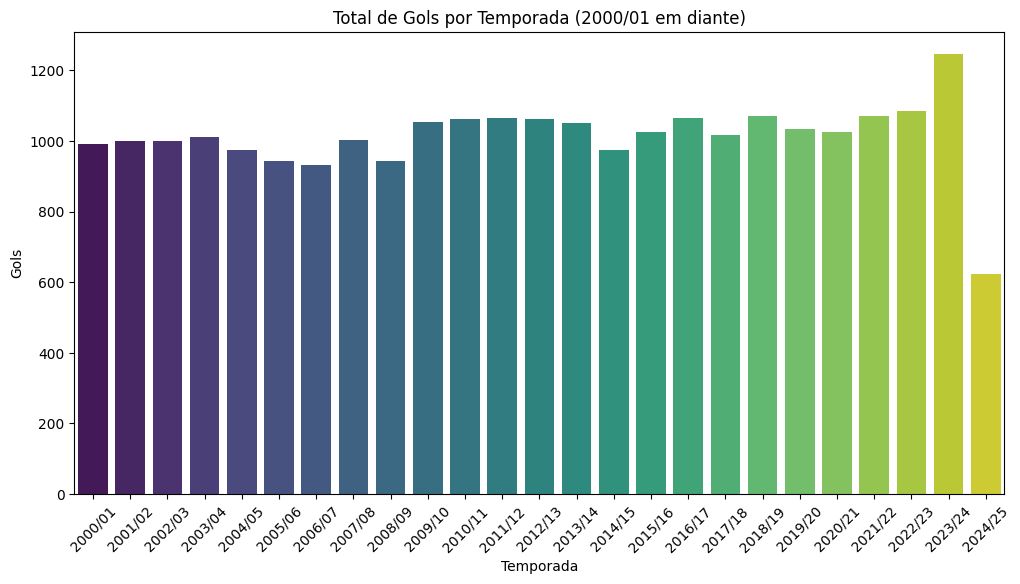

In [22]:
# Filtrar apenas temporadas de 2000/01 em diante
df_filtrado = df[df['Temporada'] >= '2000/01']

# Total de gols por temporada
plt.figure(figsize=(12,6))
gols_por_temporada = df_filtrado.groupby('Temporada')['Total_Gols'].sum().sort_index()
sns.barplot(x=gols_por_temporada.index, y=gols_por_temporada.values, palette='viridis')
plt.title('Total de Gols por Temporada (2000/01 em diante)')
plt.xlabel('Temporada')
plt.ylabel('Gols')
plt.xticks(rotation=45)
plt.show()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_3044\3987132256.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gols_totais.index, y=gols_totais.values, palette='rocket')


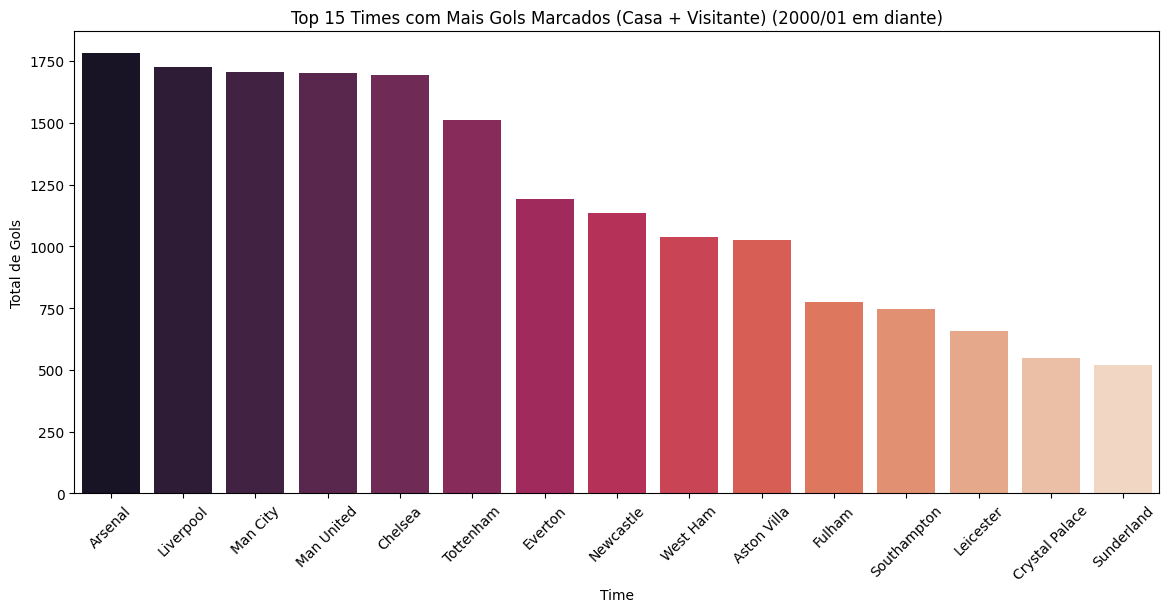

In [23]:
# Filtrar apenas temporadas de 2000/01 em diante
df_filtrado = df[df['Temporada'] >= '2000/01']

# Total de gols por time (casa + visitante)
plt.figure(figsize=(14,6))
gols_casa = df_filtrado.groupby('Time_Casa')['Gols_Time_Casa'].sum()
gols_visitante = df_filtrado.groupby('Time_Visitante')['Gols_Time_Visitante'].sum()
gols_totais = gols_casa.add(gols_visitante, fill_value=0).sort_values(ascending=False).head(15)

# Gráfico
sns.barplot(x=gols_totais.index, y=gols_totais.values, palette='rocket')
plt.title('Top 15 Times com Mais Gols Marcados (Casa + Visitante) (2000/01 em diante)')
plt.xlabel('Time')
plt.ylabel('Total de Gols')
plt.xticks(rotation=45)
plt.show()


C:\Users\Lucas\AppData\Local\Temp\ipykernel_3044\2882929458.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=amarelos_totais.index, y=amarelos_totais.values, palette='magma')


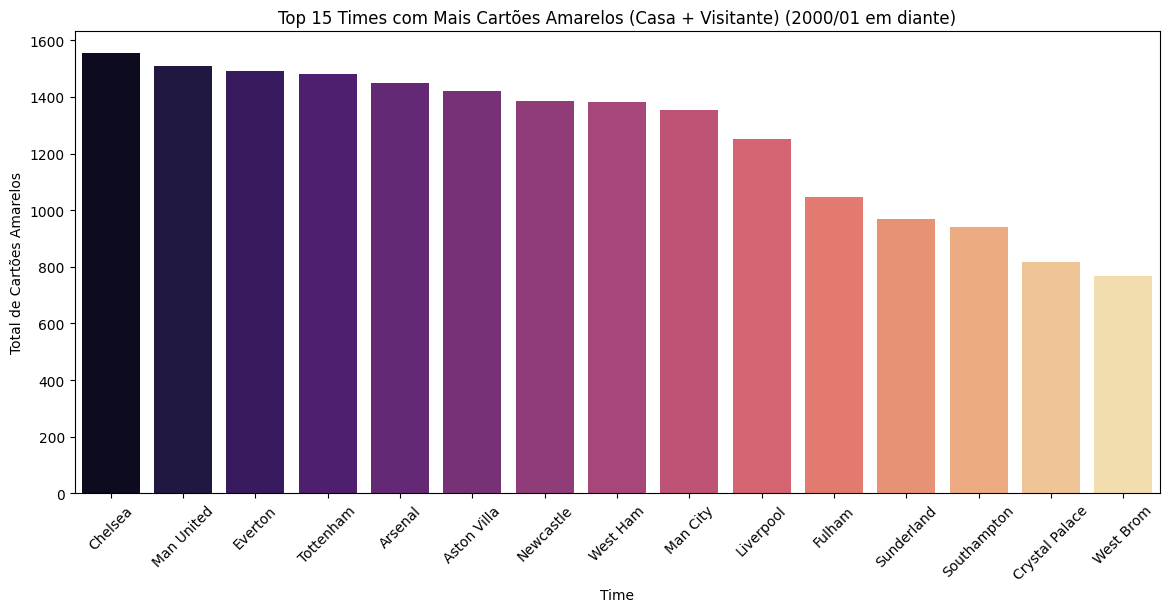

In [24]:
# Filtrar apenas temporadas de 2000/01 em diante
df_filtrado = df[df['Temporada'] >= '2000/01']

# Total de cartões amarelos por time (casa + visitante)
plt.figure(figsize=(14,6))
amarelos_casa = df_filtrado.groupby('Time_Casa')['Amarelos_Casa'].sum()
amarelos_visitante = df_filtrado.groupby('Time_Visitante')['Amarelos_Visitante'].sum()
amarelos_totais = amarelos_casa.add(amarelos_visitante, fill_value=0).sort_values(ascending=False).head(15)

# Gráfico
sns.barplot(x=amarelos_totais.index, y=amarelos_totais.values, palette='magma')
plt.title('Top 15 Times com Mais Cartões Amarelos (Casa + Visitante) (2000/01 em diante)')
plt.xlabel('Time')
plt.ylabel('Total de Cartões Amarelos')
plt.xticks(rotation=45)
plt.show()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_3044\51346918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Resultado_Final', palette='pastel')


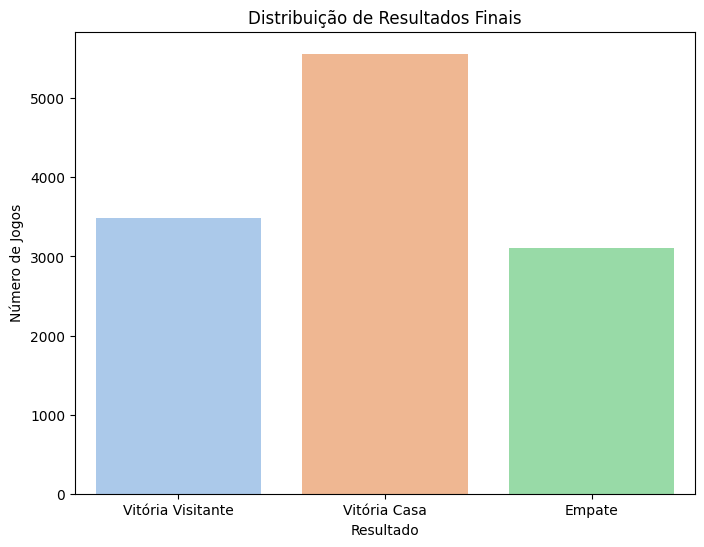

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Resultado_Final', palette='pastel')
plt.title('Distribuição de Resultados Finais')
plt.xlabel('Resultado')
plt.ylabel('Número de Jogos')
plt.show()

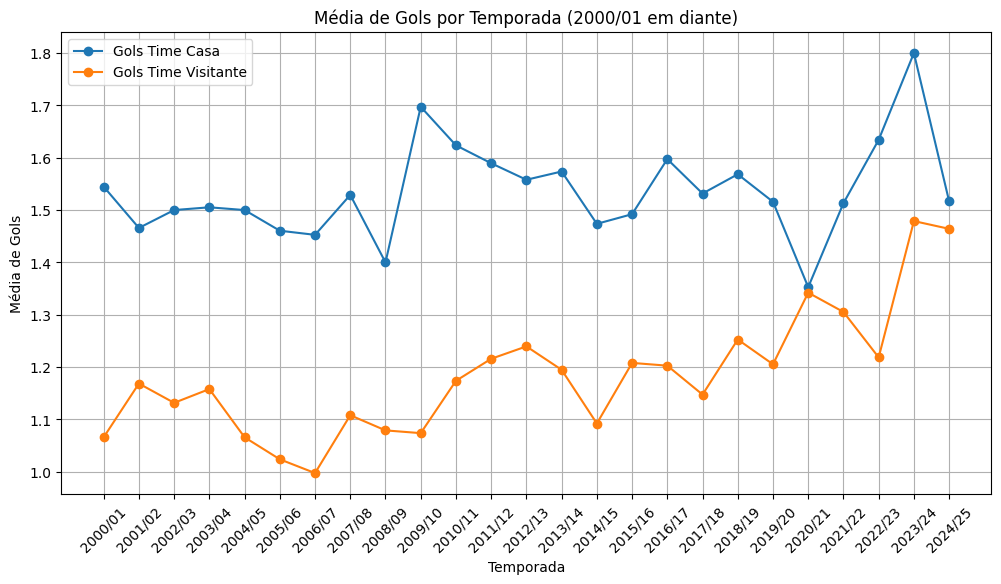

In [26]:
# Filtrar apenas temporadas de 2000/01 em diante
df_filtrado = df[df['Temporada'] >= '2000/01']

# Média de gols por temporada
plt.figure(figsize=(12,6))
media_gols_casa = df_filtrado.groupby('Temporada')['Gols_Time_Casa'].mean()
media_gols_visitante = df_filtrado.groupby('Temporada')['Gols_Time_Visitante'].mean()

plt.plot(media_gols_casa.index, media_gols_casa.values, marker='o', label='Gols Time Casa')
plt.plot(media_gols_visitante.index, media_gols_visitante.values, marker='o', label='Gols Time Visitante')

plt.title('Média de Gols por Temporada (2000/01 em diante)')
plt.xlabel('Temporada')
plt.ylabel('Média de Gols')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Lucas\AppData\Local\Temp\ipykernel_3044\148159042.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jogos_por_temporada.index, y=jogos_por_temporada.values, palette='Blues_d')


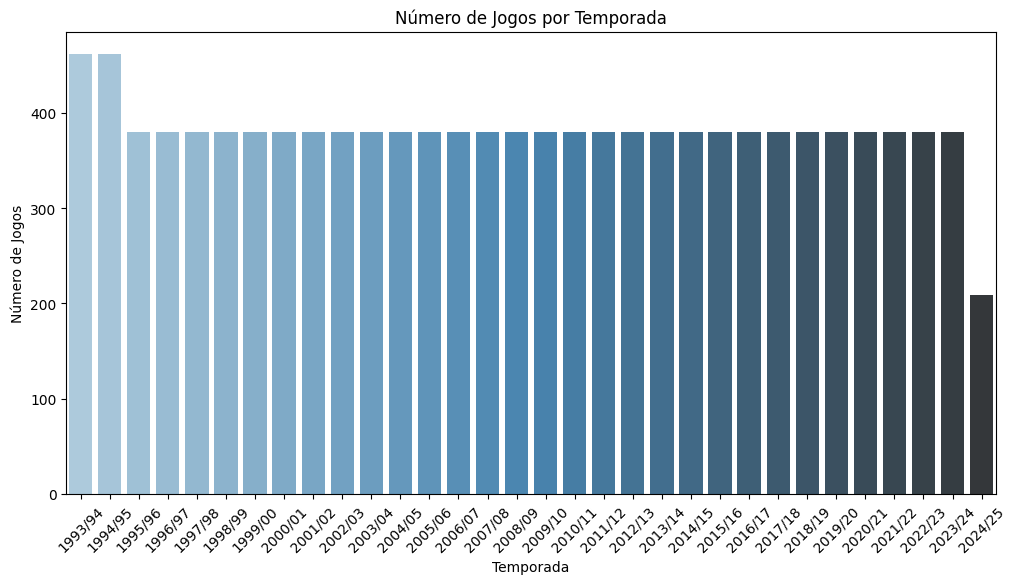

In [27]:
plt.figure(figsize=(12,6))
jogos_por_temporada = df['Temporada'].value_counts().sort_index()
sns.barplot(x=jogos_por_temporada.index, y=jogos_por_temporada.values, palette='Blues_d')
plt.title('Número de Jogos por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Número de Jogos')
plt.xticks(rotation=45)
plt.show()

In [28]:
team_mapping = {
    "Brighton": "Brighton & Hove Albion",
    "Ipswich": "Ipswich Town"
}

df["Time_Casa"] = df["Time_Casa"].replace(team_mapping)
df["Time_Visitante"] = df["Time_Visitante"].replace(team_mapping)

C:\Users\Lucas\AppData\Local\Temp\ipykernel_3044\4086947865.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vitorias_totais.values, y=vitorias_totais.index, palette='viridis')


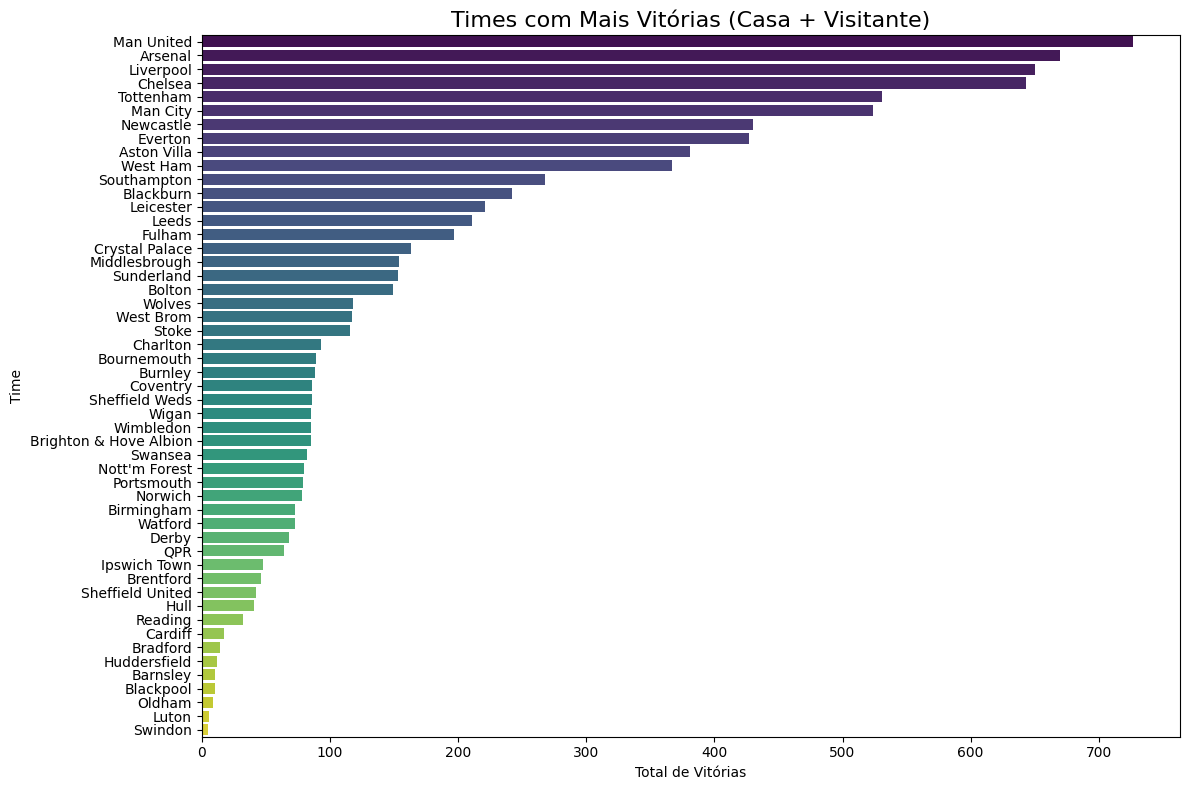

In [29]:
# 1. Vitórias em casa por time
vitorias_casa = df[df['Vitoria_Casa'] == 1]['Time_Casa'].value_counts()

# 2. Vitórias como visitante por time
vitorias_fora = df[df['Vitoria_Visitante'] == 1]['Time_Visitante'].value_counts()

# 3. Soma das vitórias
vitorias_totais = (vitorias_casa + vitorias_fora).fillna(0).sort_values(ascending=False)

# 4. Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=vitorias_totais.values, y=vitorias_totais.index, palette='viridis')
plt.title('Times com Mais Vitórias (Casa + Visitante)', fontsize=16)
plt.xlabel('Total de Vitórias')
plt.ylabel('Time')
plt.tight_layout()
plt.show()

In [30]:
# Filtrar apenas temporadas de 2000/01 em diante
df_filtrado = df[df['Temporada'] >= '2000/01']

# Variáveis para regressão
X = df_filtrado[['Chutes_Gol_Casa']]
y = df_filtrado['Gols_Time_Casa']

# Criar e treinar modelo
model = LinearRegression()
model.fit(X, y)

print(f'Intercepto: {model.intercept_:.2f}')
print(f'Coeficiente: {model.coef_[0]:.2f}')

# Previsão para 10 chutes a gol
pred = model.predict([[10]])
print(f'Gols previstos para 10 chutes a gol: {pred[0]:.2f}')

Intercepto: 0.49
Coeficiente: 0.17
Gols previstos para 10 chutes a gol: 2.23


c:\Users\Lucas\Documents\ModelagemEstatistica\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


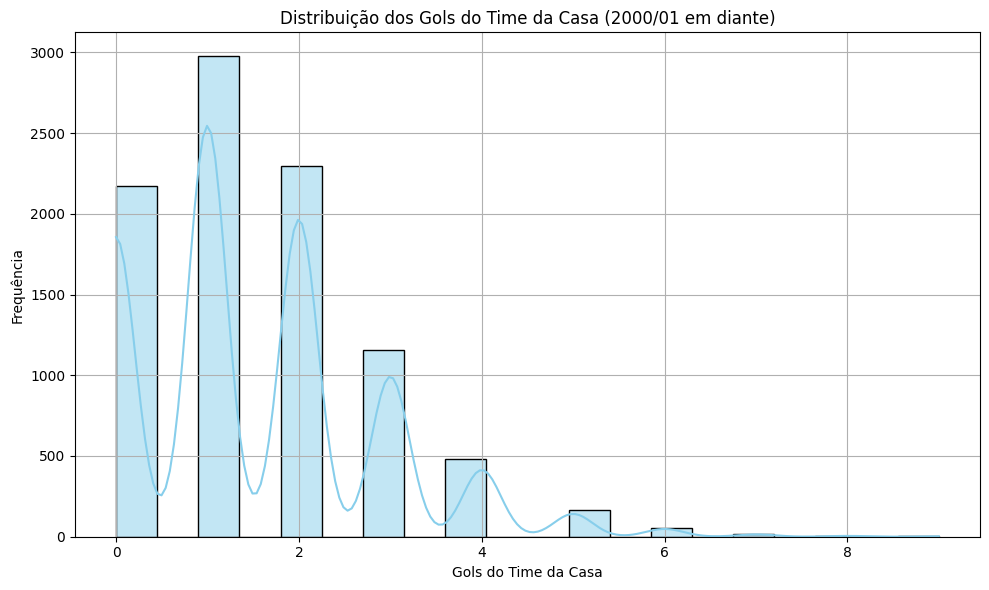

Intervalo de confiança de 95% para a média de gols do time da casa (2000/01 em diante): (1.51, 1.54, 1.56)


In [31]:
# Filtrar apenas temporadas de 2000/01 em diante
df_filtrado = df[df['Temporada'] >= '2000/01']

# Histograma da distribuição de gols do time da casa
plt.figure(figsize=(10, 6))
sns.histplot(df_filtrado['Gols_Time_Casa'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição dos Gols do Time da Casa (2000/01 em diante)')
plt.xlabel('Gols do Time da Casa')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()

# Bootstrap: média de gols do time da casa
n_iterations = 1000
bootstrap_means = []

for _ in range(n_iterations):
    sample = df_filtrado['Gols_Time_Casa'].sample(frac=1, replace=True)
    bootstrap_means.append(sample.mean())

# Intervalo de confiança bootstrap (95%)
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)
bootstrap_mean = np.mean(bootstrap_means)

print(f"Intervalo de confiança de 95% para a média de gols do time da casa (2000/01 em diante): ({ci_lower:.2f}, {bootstrap_mean:.2f}, {ci_upper:.2f})")

In [32]:

# Campeões por temporada (mais vitórias em casa)
champions = df.groupby(['Temporada', 'Time_Casa'])['Vitoria_Casa'].sum().reset_index()
champions = champions.sort_values(['Temporada', 'Vitoria_Casa'], ascending=[True, False])
champions = champions.groupby('Temporada').head(1)

# Marcar campeões no dataset
df['Campeao'] = df['Time_Casa'].isin(champions['Time_Casa'])

# Grupos
gols_campeoes = df[df['Campeao']]['Gols_Time_Casa'].values
gols_outros = df[~df['Campeao']]['Gols_Time_Casa'].values

# Teste t
t_stat, p_value = ttest_ind(gols_campeoes, gols_outros, equal_var=False)

# Resultado
print("=== Teste t: Campeões x Outros Times ===")
print(f"Estatística t: {t_stat:.4f}")
print(f"p-valor: {p_value:.4f}")
print(f"Média Campeões: {gols_campeoes.mean():.4f}")
print(f"Média Outros: {gols_outros.mean():.4f}")

# Interpretação
alpha_levels = [0.01, 0.05, 0.10]
for alpha in alpha_levels:
    if p_value < alpha:
        resultado = "Rejeita H0 → diferença significativa"
    else:
        resultado = "Não rejeita H0 → diferença não significativa"
    print(f"α = {alpha}: {resultado}")


=== Teste t: Campeões x Outros Times ===
Estatística t: 22.2641
p-valor: 0.0000
Média Campeões: 1.9436
Média Outros: 1.3428
α = 0.01: Rejeita H0 → diferença significativa
α = 0.05: Rejeita H0 → diferença significativa
α = 0.1: Rejeita H0 → diferença significativa


In [33]:
# Sucessos e total
vitorias_casa = df['Vitoria_Casa'].sum()
vitorias_visitante = df['Vitoria_Visitante'].sum()
total = vitorias_casa + vitorias_visitante

# Teste z
stat_z, p_value_z = proportions_ztest([vitorias_casa, vitorias_visitante], [total, total])

print("\n=== Teste z: Vitórias Casa x Visitante ===")
print(f"Estatística z: {stat_z:.4f}")
print(f"p-valor: {p_value_z:.4f}")
print(f"Proporção Vitórias Casa: {vitorias_casa / total:.4f}")
print(f"Proporção Vitórias Visitante: {vitorias_visitante / total:.4f}")



=== Teste z: Vitórias Casa x Visitante ===
Estatística z: 30.9445
p-valor: 0.0000
Proporção Vitórias Casa: 0.6150
Proporção Vitórias Visitante: 0.3850


In [34]:
# Filtrar apenas temporadas de 2000/01 em diante
df_filtrado = df[df['Temporada'] >= '2000/01']

# Variáveis
chutes_gol = df_filtrado['Chutes_Gol_Casa'].values
gols = df_filtrado['Gols_Time_Casa'].values

# Correlação
r_stat, p_value_r = pearsonr(chutes_gol, gols)

print("\n=== Correlação de Pearson: Chutes a Gol x Gols (2000/01 em diante) ===")
print(f"Coeficiente r: {r_stat:.4f}")
print(f"p-valor: {p_value_r:.4f}")



=== Correlação de Pearson: Chutes a Gol x Gols (2000/01 em diante) ===
Coeficiente r: 0.4359
p-valor: 0.0000


C:\Users\Lucas\AppData\Local\Temp\ipykernel_3044\455525753.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Temporada', y='Total_Gols', data=df_filtrado, palette='Spectral')


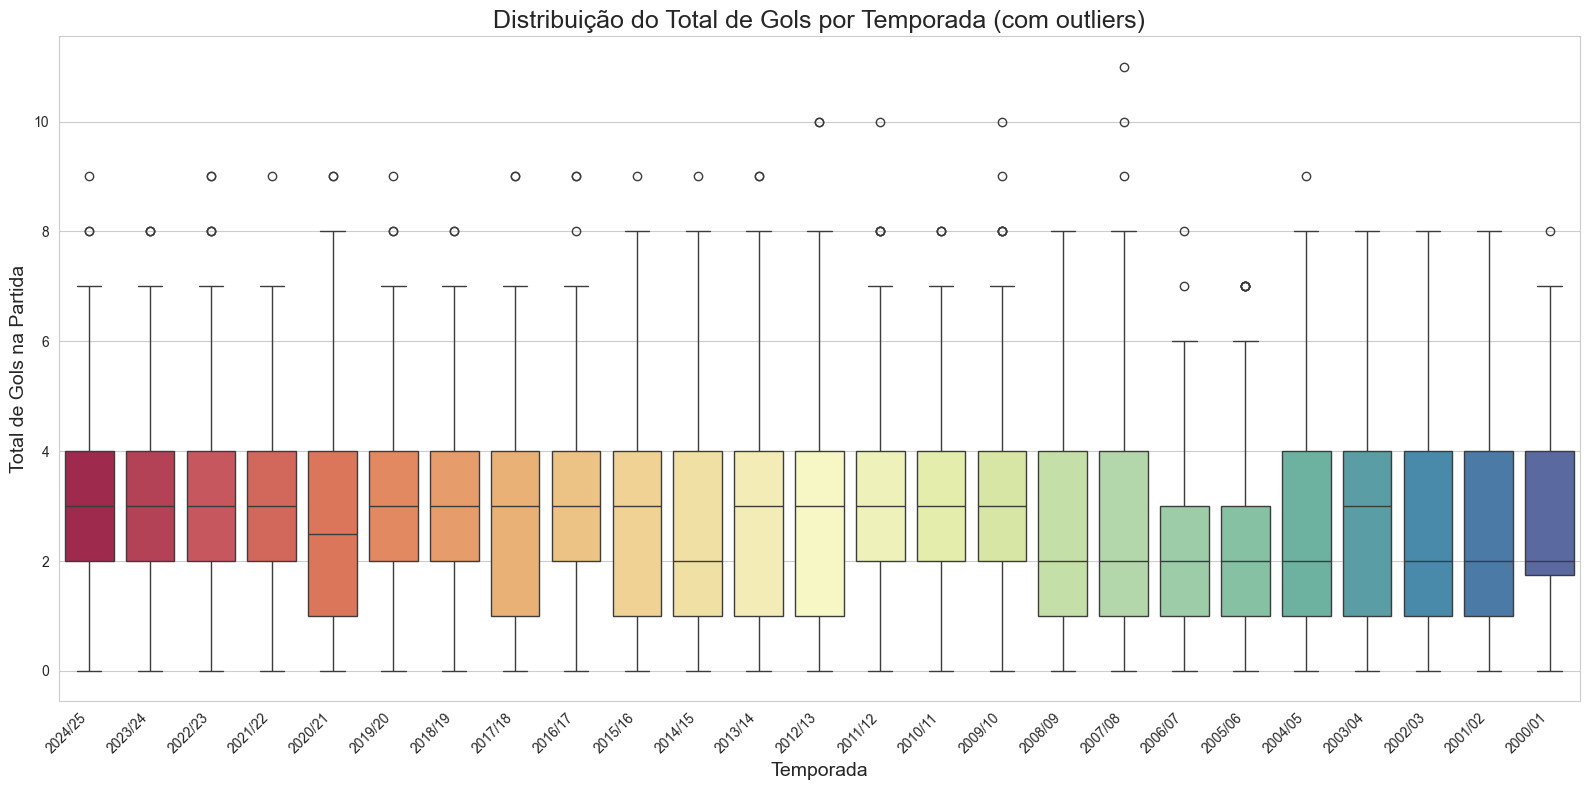

In [36]:
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')

#Boxplot do total de gols por temporada
sns.boxplot(x='Temporada', y='Total_Gols', data=df_filtrado, palette='Spectral')

plt.xticks(rotation=45, ha='right')
plt.title('Distribuição do Total de Gols por Temporada (com outliers)', fontsize=18)
plt.xlabel('Temporada', fontsize=14)
plt.ylabel('Total de Gols na Partida', fontsize=14)
plt.tight_layout()
plt.show()

In [35]:
# Salvar no ambiente do Colab
df.to_csv('premier_league_atualizado.csv', index=False)